In [1]:
from baynes.model_utils import *
from baynes import probability
from baynes.plotter import FitPlotter
from baynes.analysis import standard_analysis
from baynes.toyMC import SpectraSampler

import cmdstanpy
from cmdstanpy import CmdStanModel
import logging
import matplotlib

cmdstanpy.utils.get_logger().setLevel(logging.ERROR)

### Pileup model

Number of events in ROI:  256765


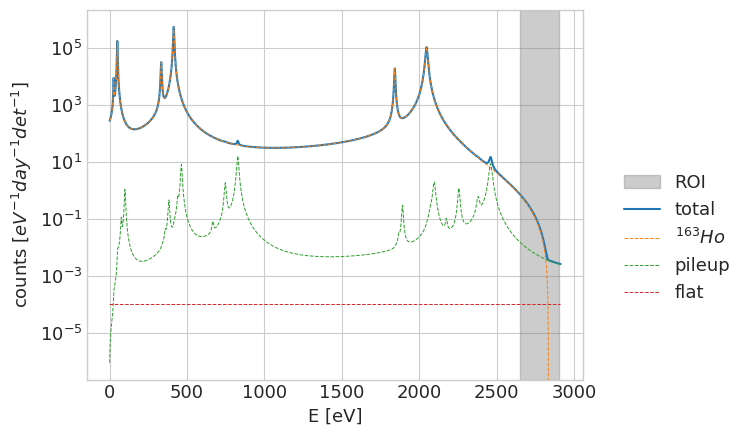

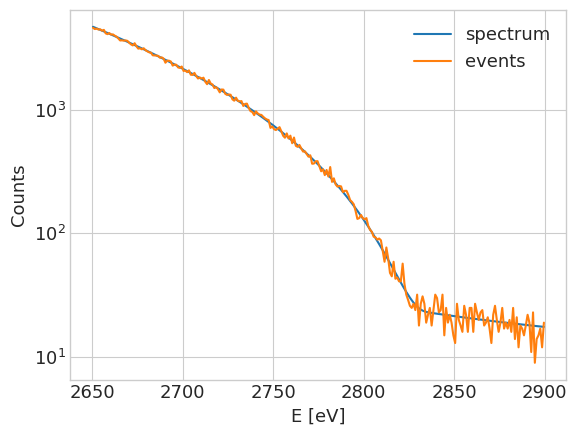

In [65]:
m = 0
Q = 2833.8
A_Ho = 100
bkg = 1e-4
pu = 1e-4
FWHM=5
n_days = 100

s = SpectraSampler({'$^{163}Ho$': [probability.HoSpectrum, [m, Q], A_Ho]}, flat_bkg=bkg, f_pileup=pu, FWHM=FWHM, dE=1, integrate=False)
s.plot_spectrum()
s.set_measure_time(n_days, n_det=64)

events = s.sample()[0]
s.plot_events(events)

true_pars = [m, Q, s.weights_in_ROI[2], s.weights_in_ROI[1], s.sigma]

Found .stan file  /home/pietro/work/TESI/baynes/stan/models/163Ho/endpoint_pileup/Ho_endpoint_pileup.stan

 ---- Sampling the priors ---- 


 ---- Prior predictive check ---- 



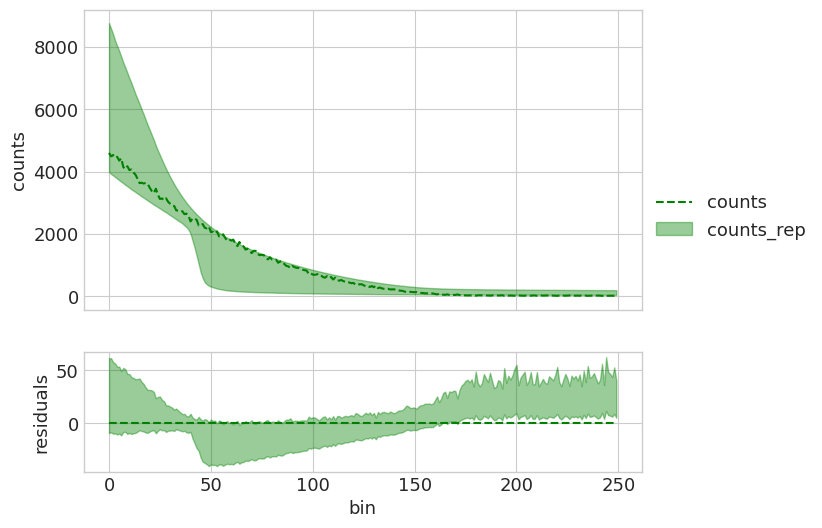


 ---- Prior distribustions ---- 



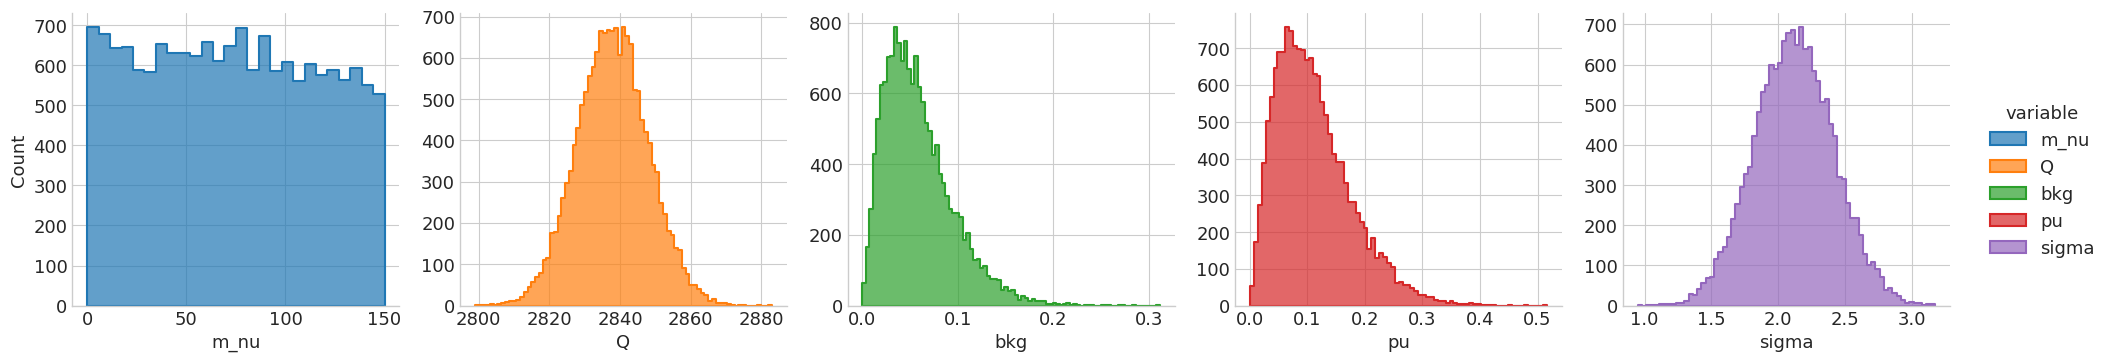


 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

chain 9 |          | 00:00 Status

chain 10 |          | 00:00 Status

chain 11 |          | 00:00 Status

chain 12 |          | 00:00 Status

chain 13 |          | 00:00 Status

chain 14 |          | 00:00 Status

chain 15 |          | 00:00 Status

chain 16 |          | 00:00 Status

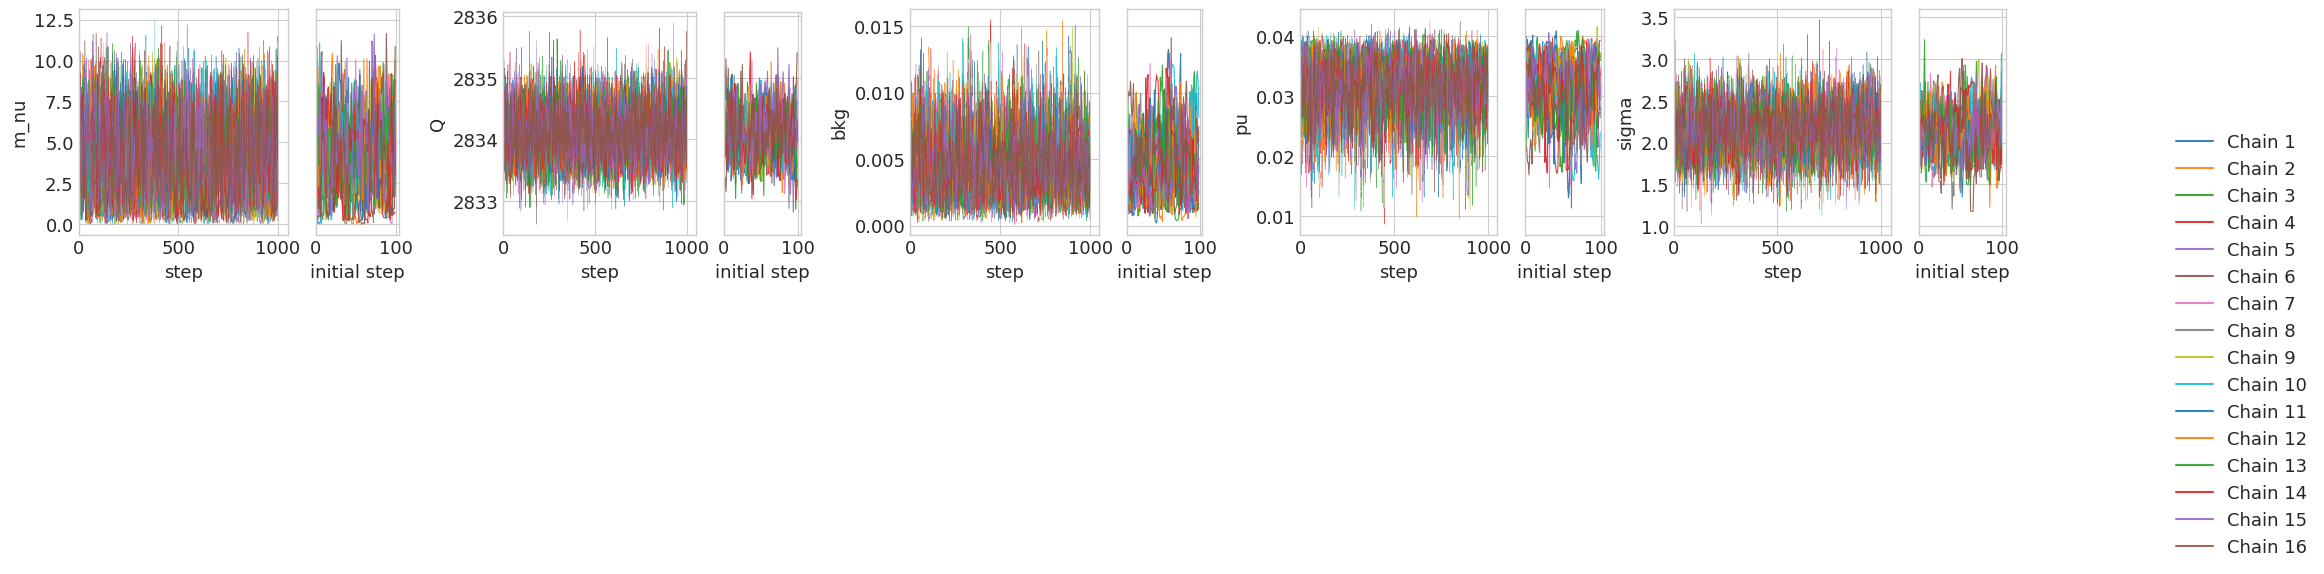


 ---- Prior predictive check ---- 



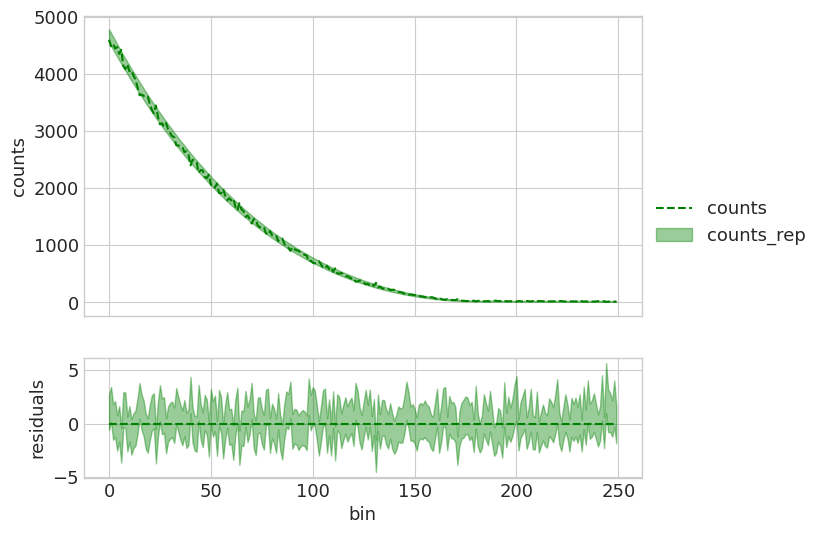


 ---- Posterior distribustions ---- 



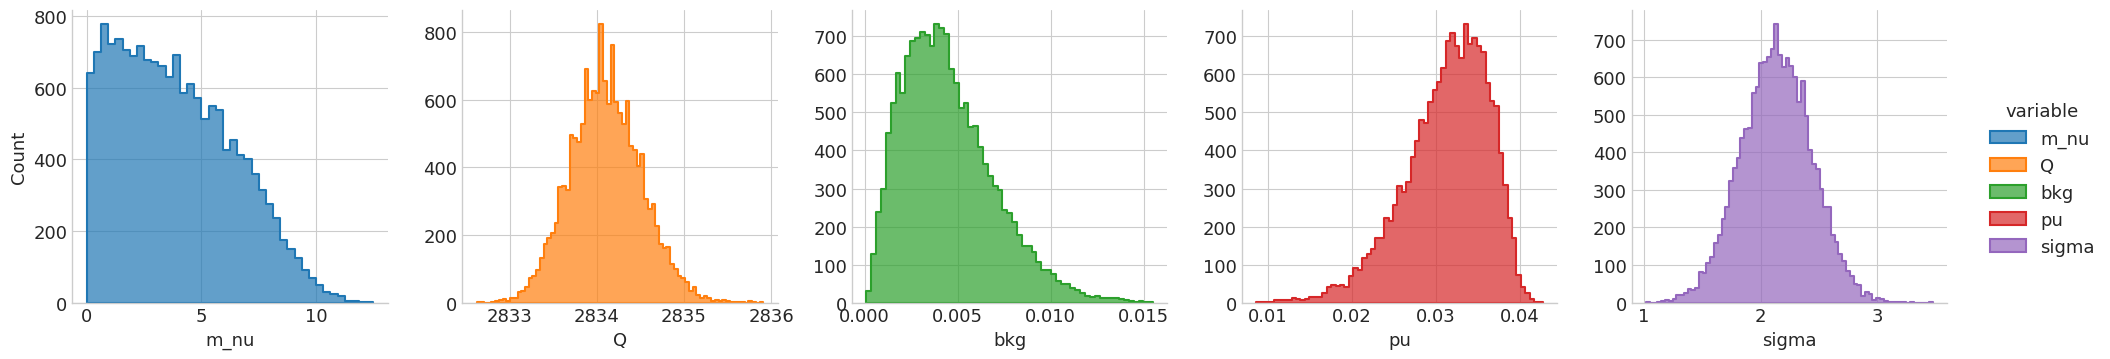


 ---- Prior vs posterior comparison ---- 



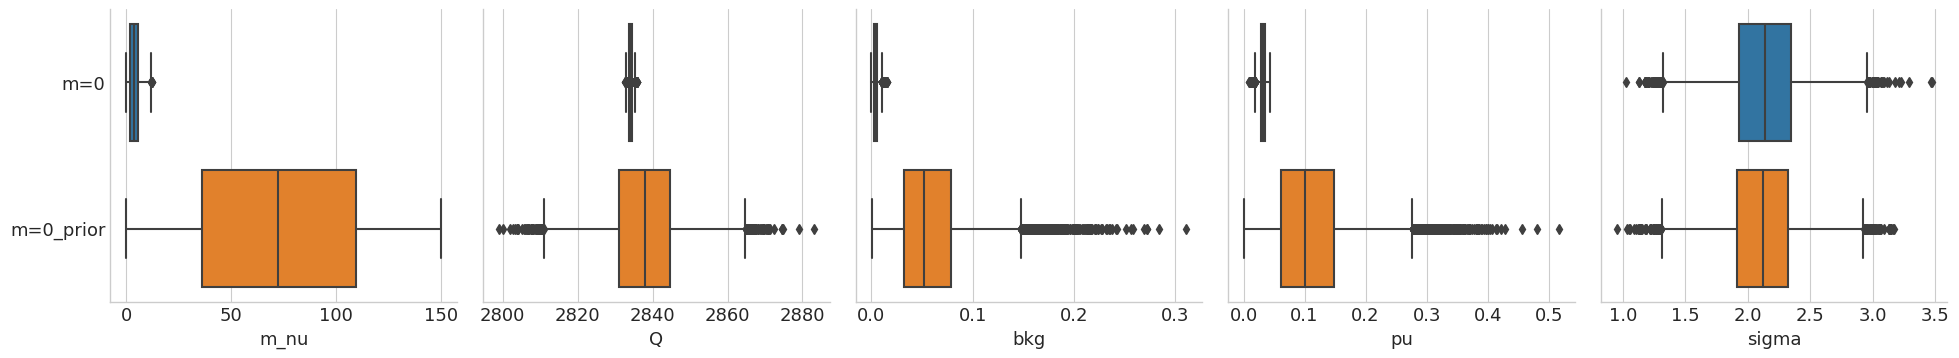

In [66]:
stan_file= get_stan_file("Ho_endpoint_pileup.stan")
pileup_model = CmdStanModel(stan_file=stan_file,
                     **get_compiler_kwargs())

data={'N_bins': len(events), 
      'N_window': 51,
      'x': s.ROI_bin_edges, 
      'counts': events,
      'N_ev': s.n_events,
      'p_Q': 2838,
      'p_FWHM': FWHM,
}

sampler_kwargs={
    'chains': 16,
    'iter_warmup': 1000,
    'iter_sampling': 500,
    'save_warmup': True, 
    'max_treedepth': 11
}

plot_pars = ['m_nu', 'Q', 'bkg', 'pu', 'sigma']
p = FitPlotter(col_wrap=5, style='seaborn-v0_8-whitegrid', save=True)
fit = standard_analysis(pileup_model, data, p, {'chains': 16}, fit_title='m=0', plot_params = plot_pars)

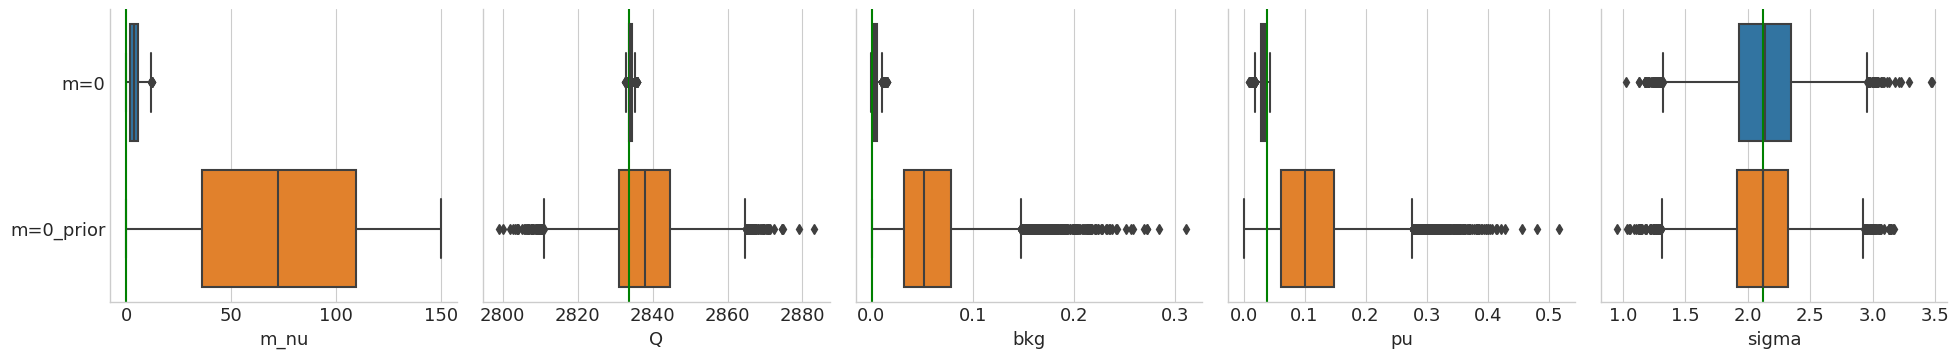

In [68]:
p.add_lines(true_pars, color='green')

In [10]:
import numpy as np
m = 0
Q = 2833.8
A_Ho = 1
bkg = 1e-4
FWHM=5
n_days = 100

n_det = 16
Qs=[]
N_evs=[]
events = []
for i in range(n_det):
    Qs.append(np.random.normal(2833.8, 10))
    A=np.random.normal(1, 0.1)

    s = SpectraSampler({'$^{163}Ho$': [probability.HoSpectrum, [m, Qs[-1]], A]}, flat_bkg=bkg, FWHM=FWHM, dE=1, integrate=False)
    #s.plot_spectrum()
    s.set_measure_time(n_days, n_det=1)

    events.append(s.sample()[0])
    N_evs.append(s.n_events)
   # s.plot_events(events[-1])

#true_pars = [m, Q, s.weights_in_ROI[2], s.weights_in_ROI[1], s.sigma]

Number of events in ROI:  41
Number of events in ROI:  50
Number of events in ROI:  45
Number of events in ROI:  50
Number of events in ROI:  43
Number of events in ROI:  36
Number of events in ROI:  38
Number of events in ROI:  32
Number of events in ROI:  36
Number of events in ROI:  42
Number of events in ROI:  35
Number of events in ROI:  49
Number of events in ROI:  41
Number of events in ROI:  44
Number of events in ROI:  65
Number of events in ROI:  41


Found .stan file  /home/pietro/work/TESI/baynes/stan/models/163Ho/endpoint_multidet/Ho_endpoint_multidet.stan

 ---- Sampling the priors ---- 


 ---- Prior predictive check ---- 



/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:417: RuntimeWarning: invalid value encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),
/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:417: RuntimeWarning: divide by zero encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),


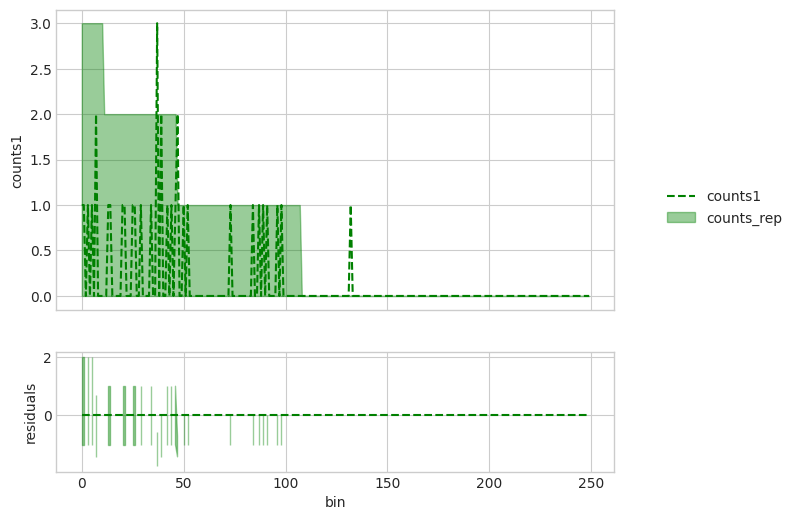


 ---- Prior distribustions ---- 



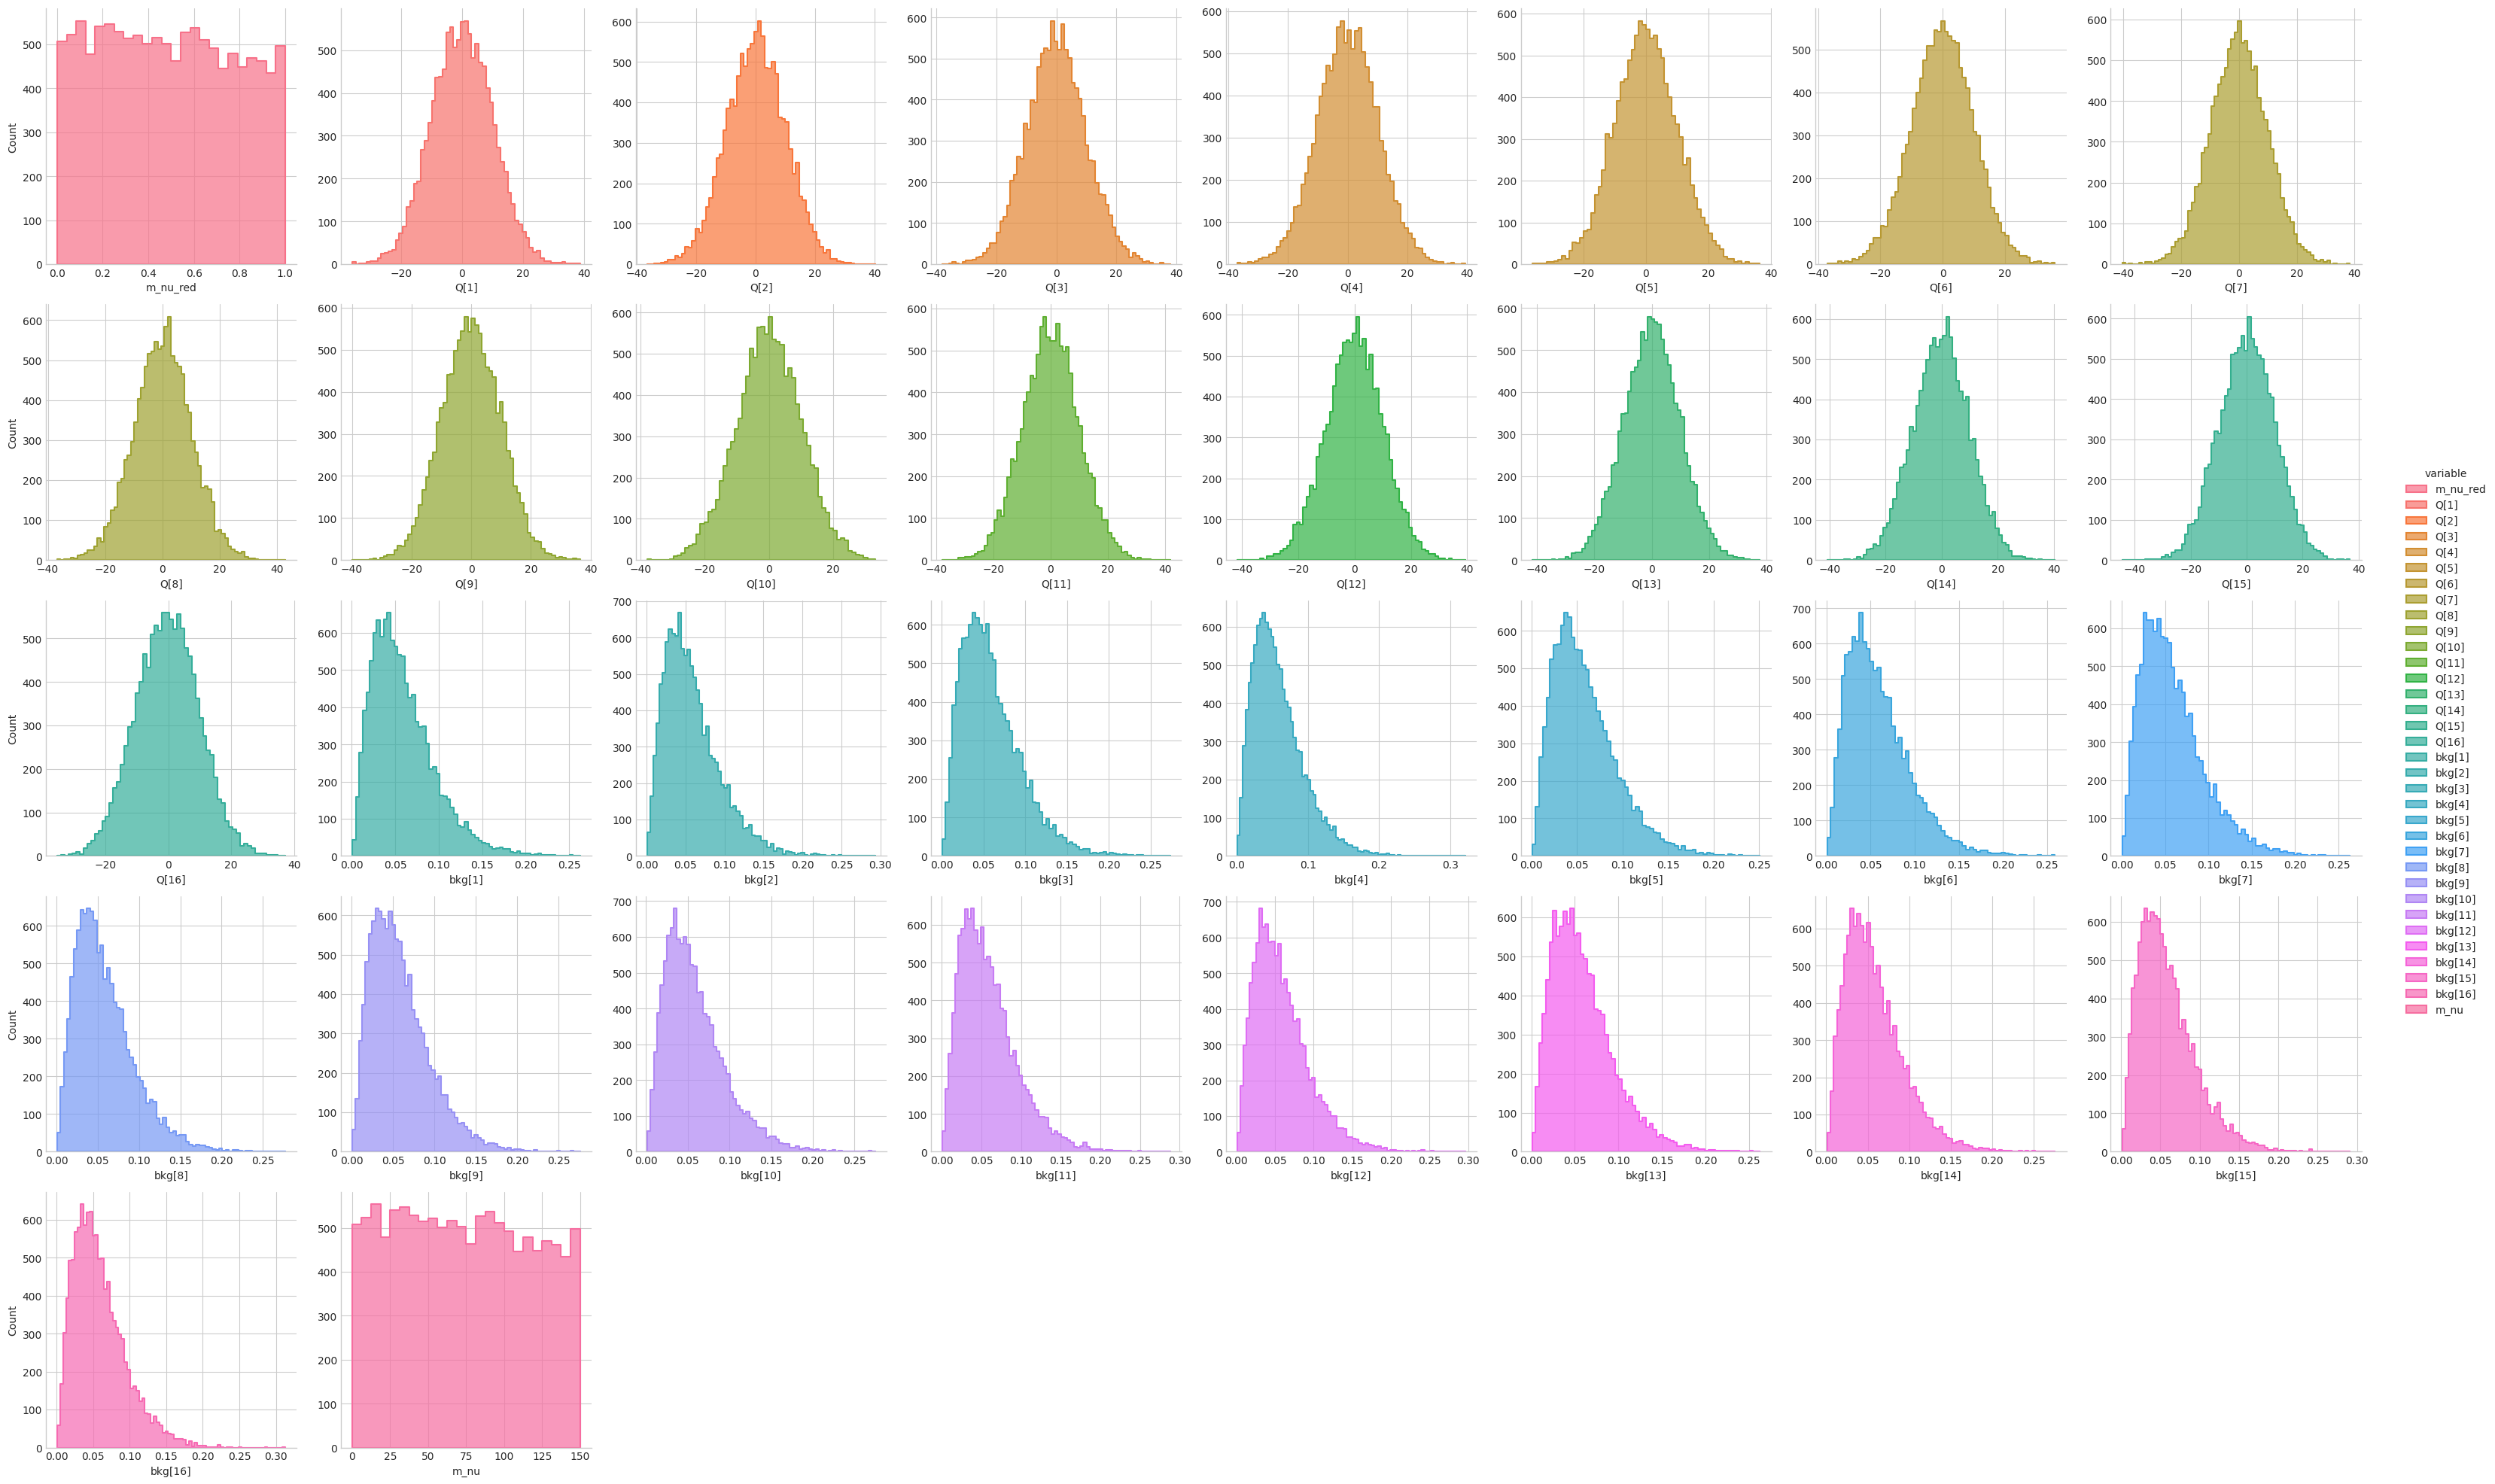


 ---- Fitting the model ---- 



chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

chain 9 |          | 00:00 Status

chain 10 |          | 00:00 Status

chain 11 |          | 00:00 Status

chain 12 |          | 00:00 Status

chain 13 |          | 00:00 Status

chain 14 |          | 00:00 Status

chain 15 |          | 00:00 Status

chain 16 |          | 00:00 Status

chain 17 |          | 00:00 Status

chain 18 |          | 00:00 Status

chain 19 |          | 00:00 Status

chain 20 |          | 00:00 Status

chain 21 |          | 00:00 Status

chain 22 |          | 00:00 Status

chain 23 |          | 00:00 Status

chain 24 |          | 00:00 Status

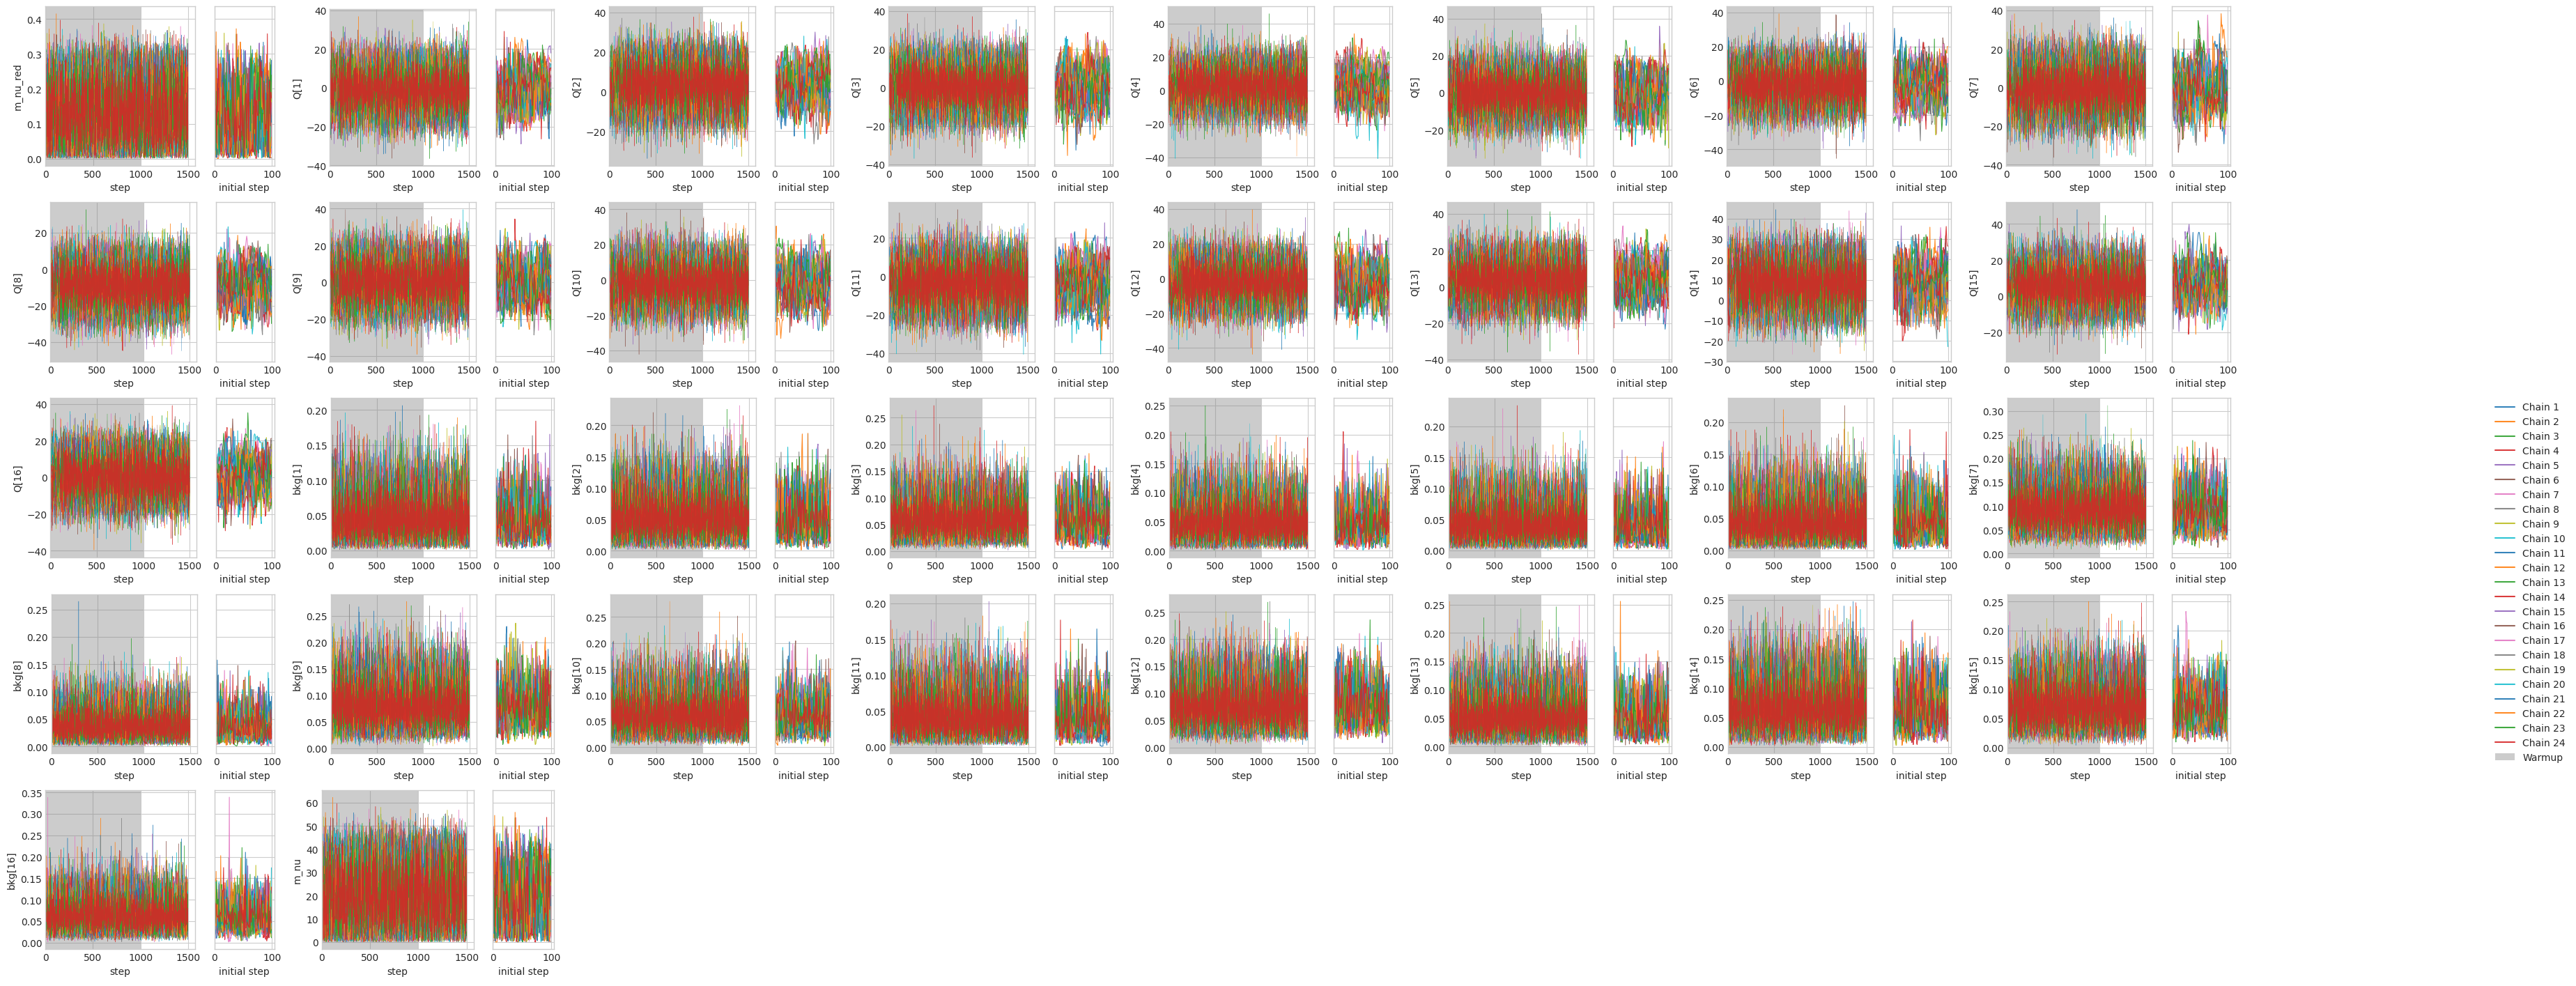


 ---- Prior predictive check ---- 



/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:417: RuntimeWarning: invalid value encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),
/home/pietro/.virtualenvs/baynesenv/lib/python3.10/site-packages/baynes/plotter.py:417: RuntimeWarning: divide by zero encountered in divide
  ax1.fill_between(np.arange(len(events)), (lo-events)/np.sqrt(events), (hi-events)/np.sqrt(events),


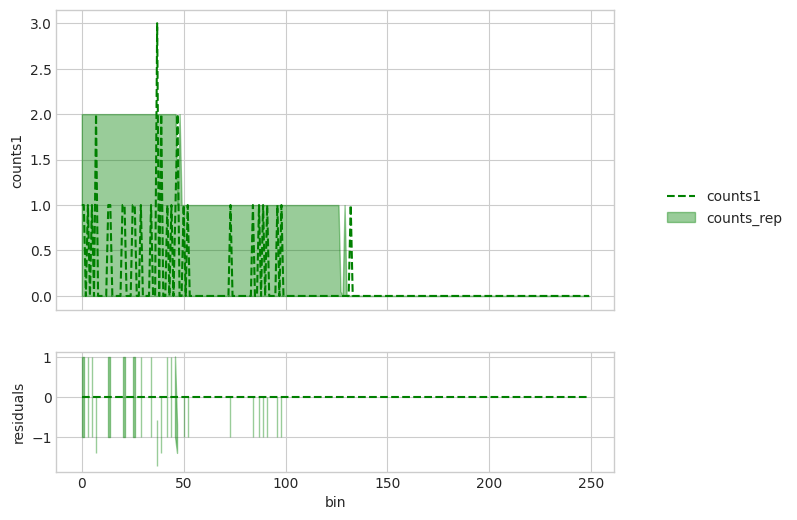


 ---- Posterior distribustions ---- 



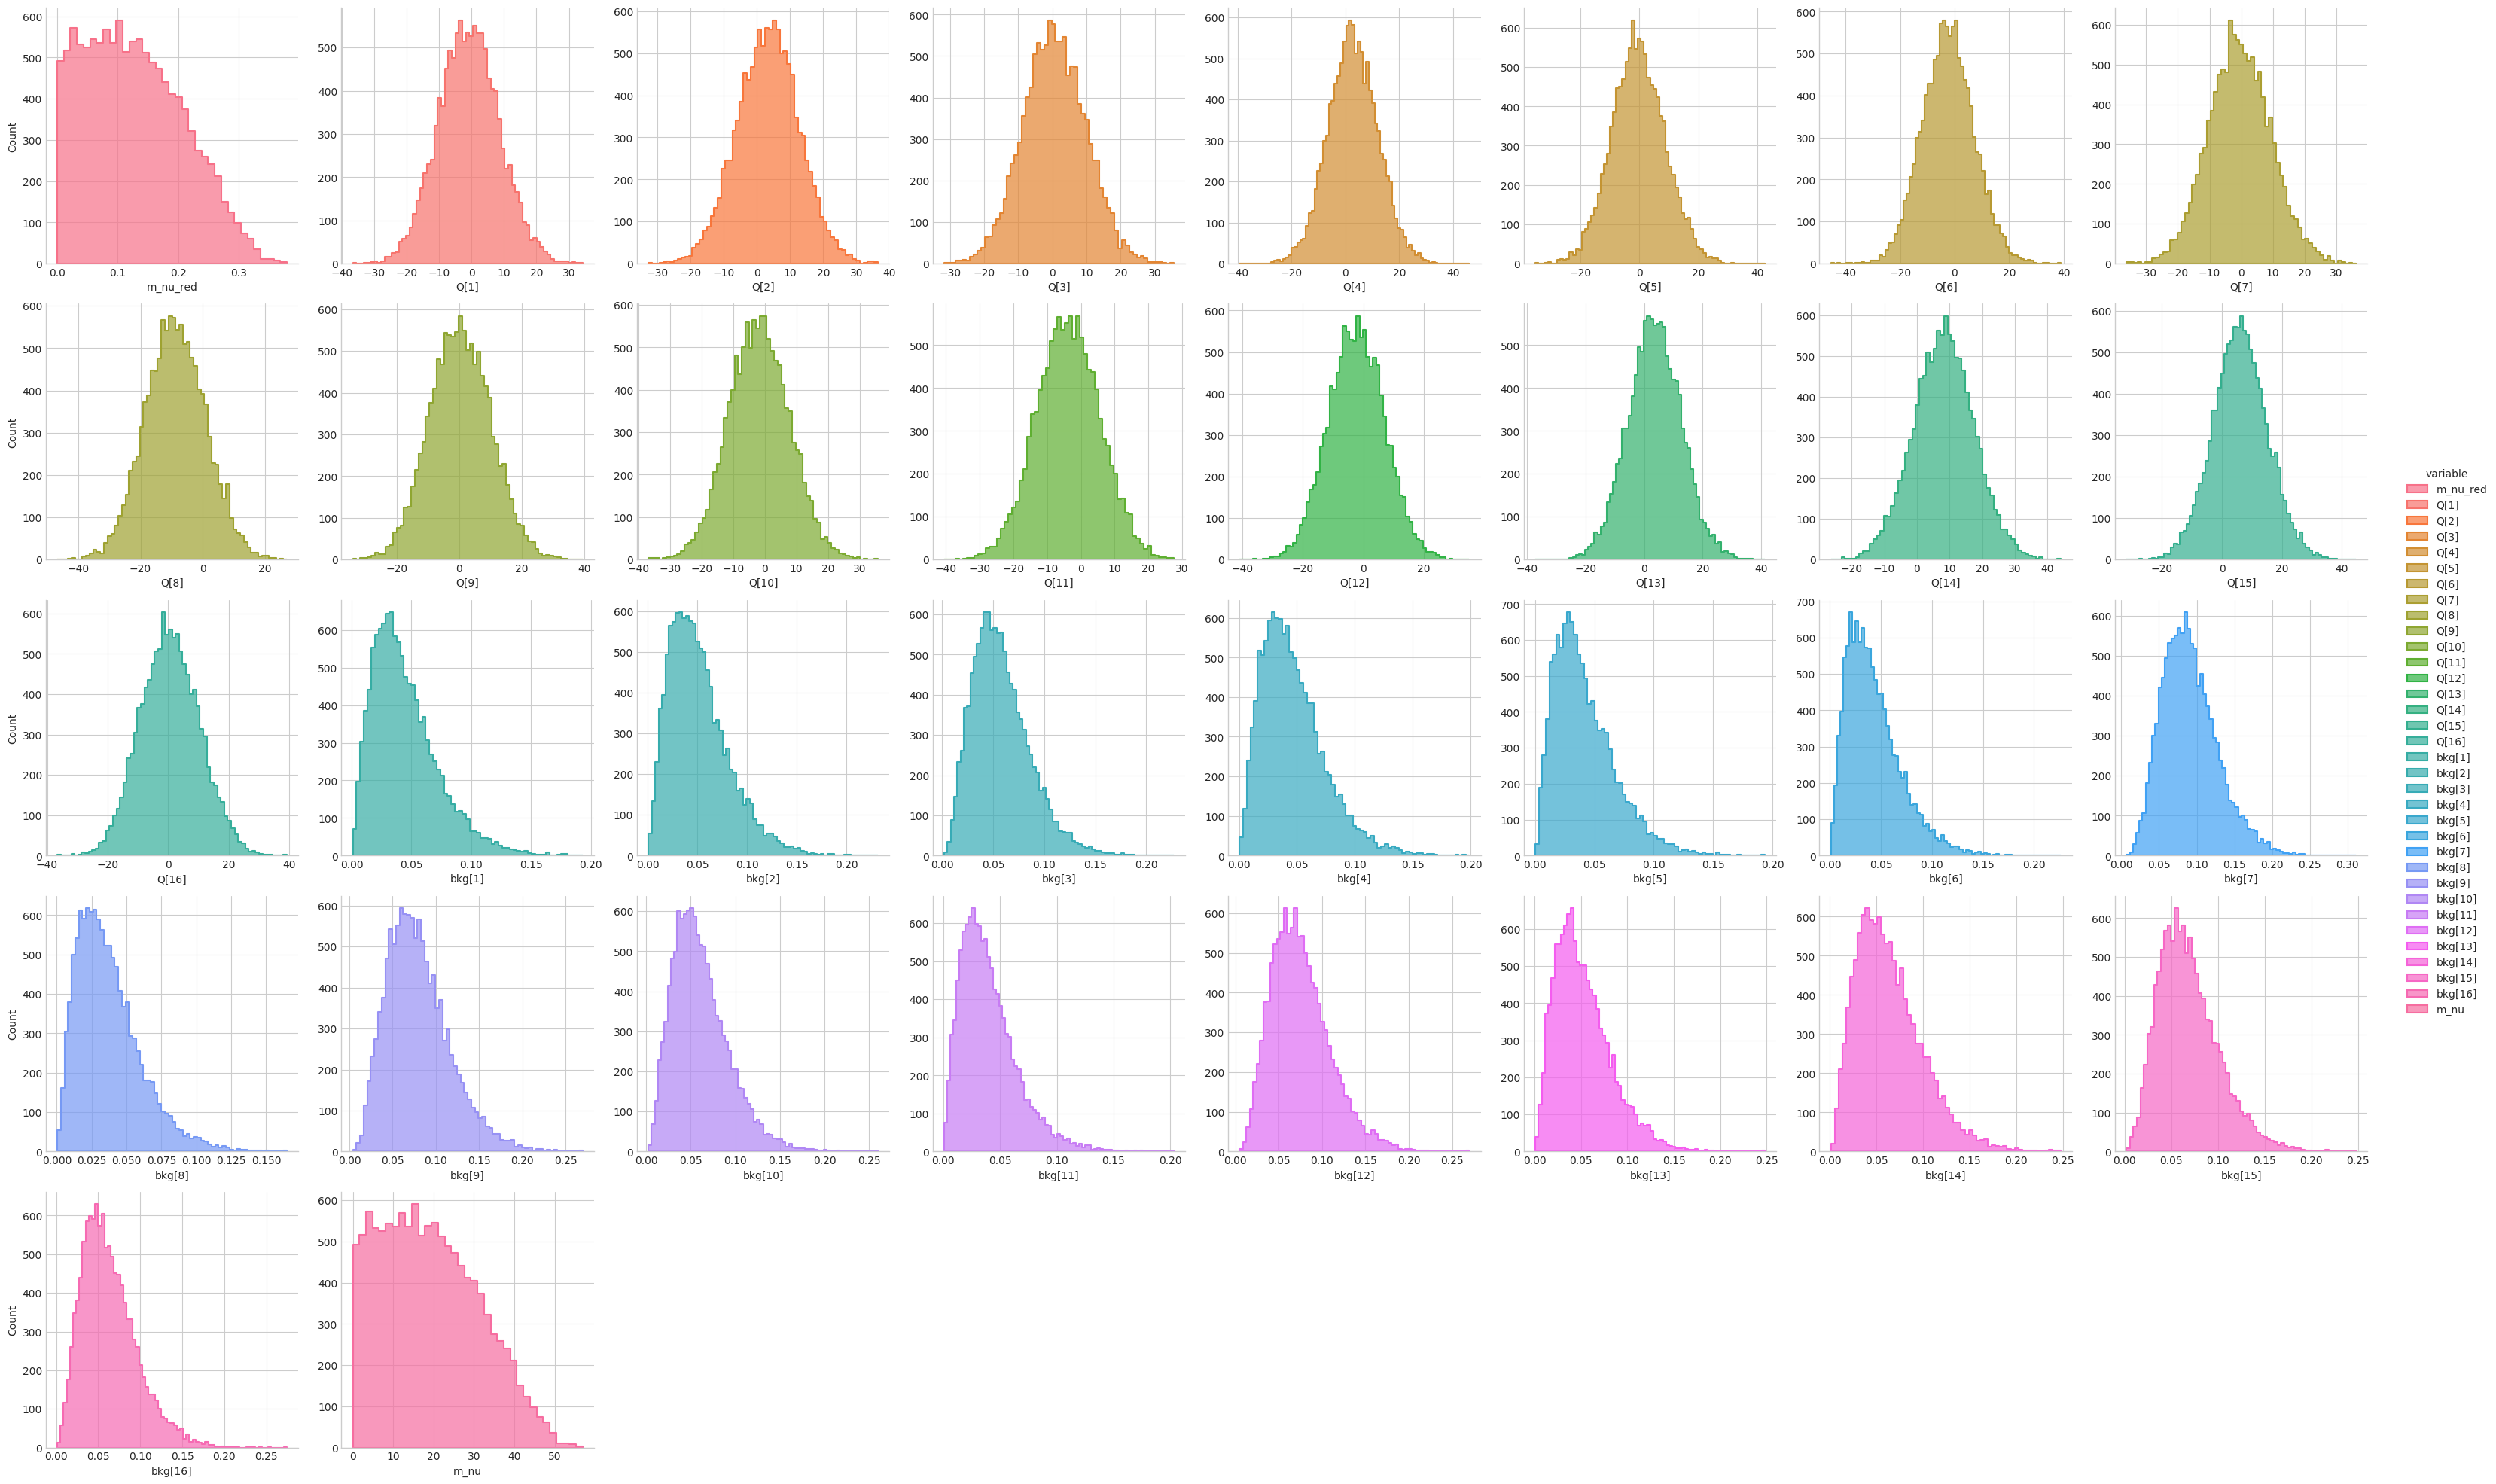


 ---- Prior vs posterior comparison ---- 



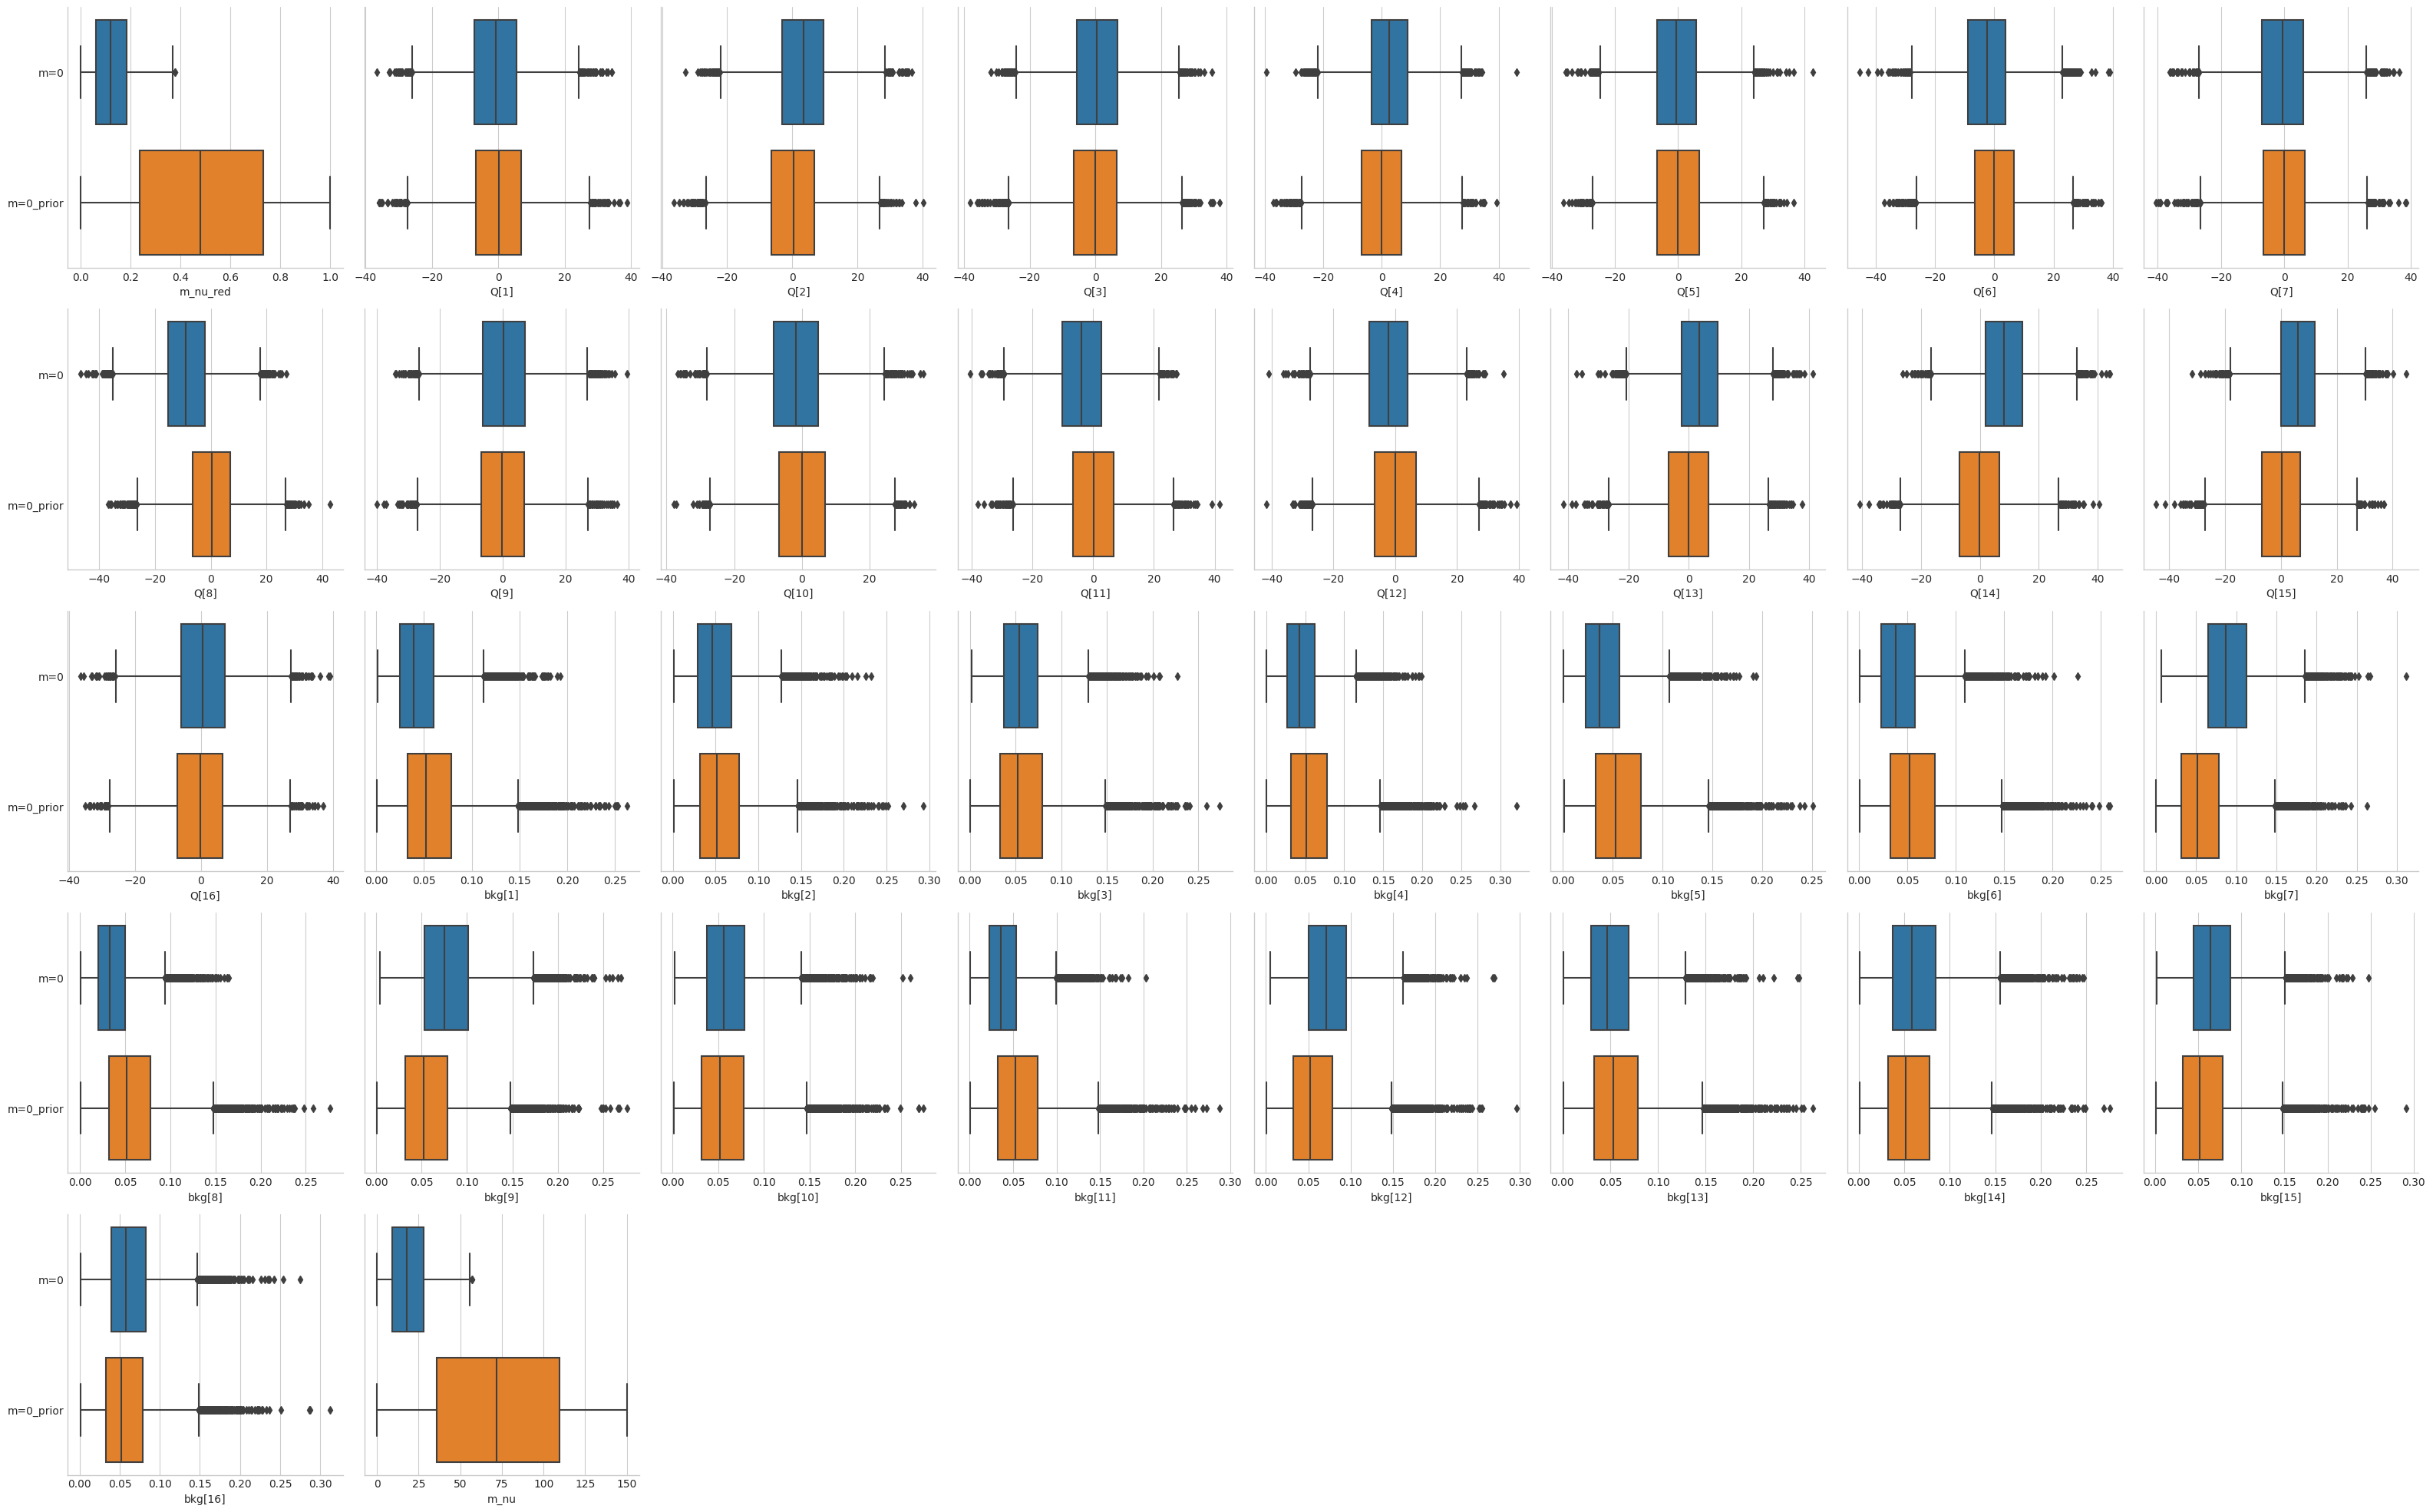

In [11]:
stan_file= get_stan_file("Ho_endpoint_multidet.stan")
pileup_model = CmdStanModel(stan_file=stan_file,
                     **get_compiler_kwargs())

data={'N_bins': len(events[1]), 
      'N_det': n_det,
      'N_window': 51,
      'x': s.ROI_bin_edges, 
      'counts': events,
      'counts1': events[0],
      'N_ev': N_evs,
      'p_Q': 2838,
      'p_FWHM': FWHM,
      'shift': 2838
}

sampler_kwargs={
    'chains': 24,
    'iter_warmup': 1000,
    'iter_sampling': 500,
    'save_warmup': True, 
    'adapt_delta': 0.9
}

p = FitPlotter(col_wrap=8, style='seaborn-v0_8-whitegrid', save=True)
fit = standard_analysis(pileup_model, data, p, sampler_kwargs, fit_title='m=0', data_key='counts1')

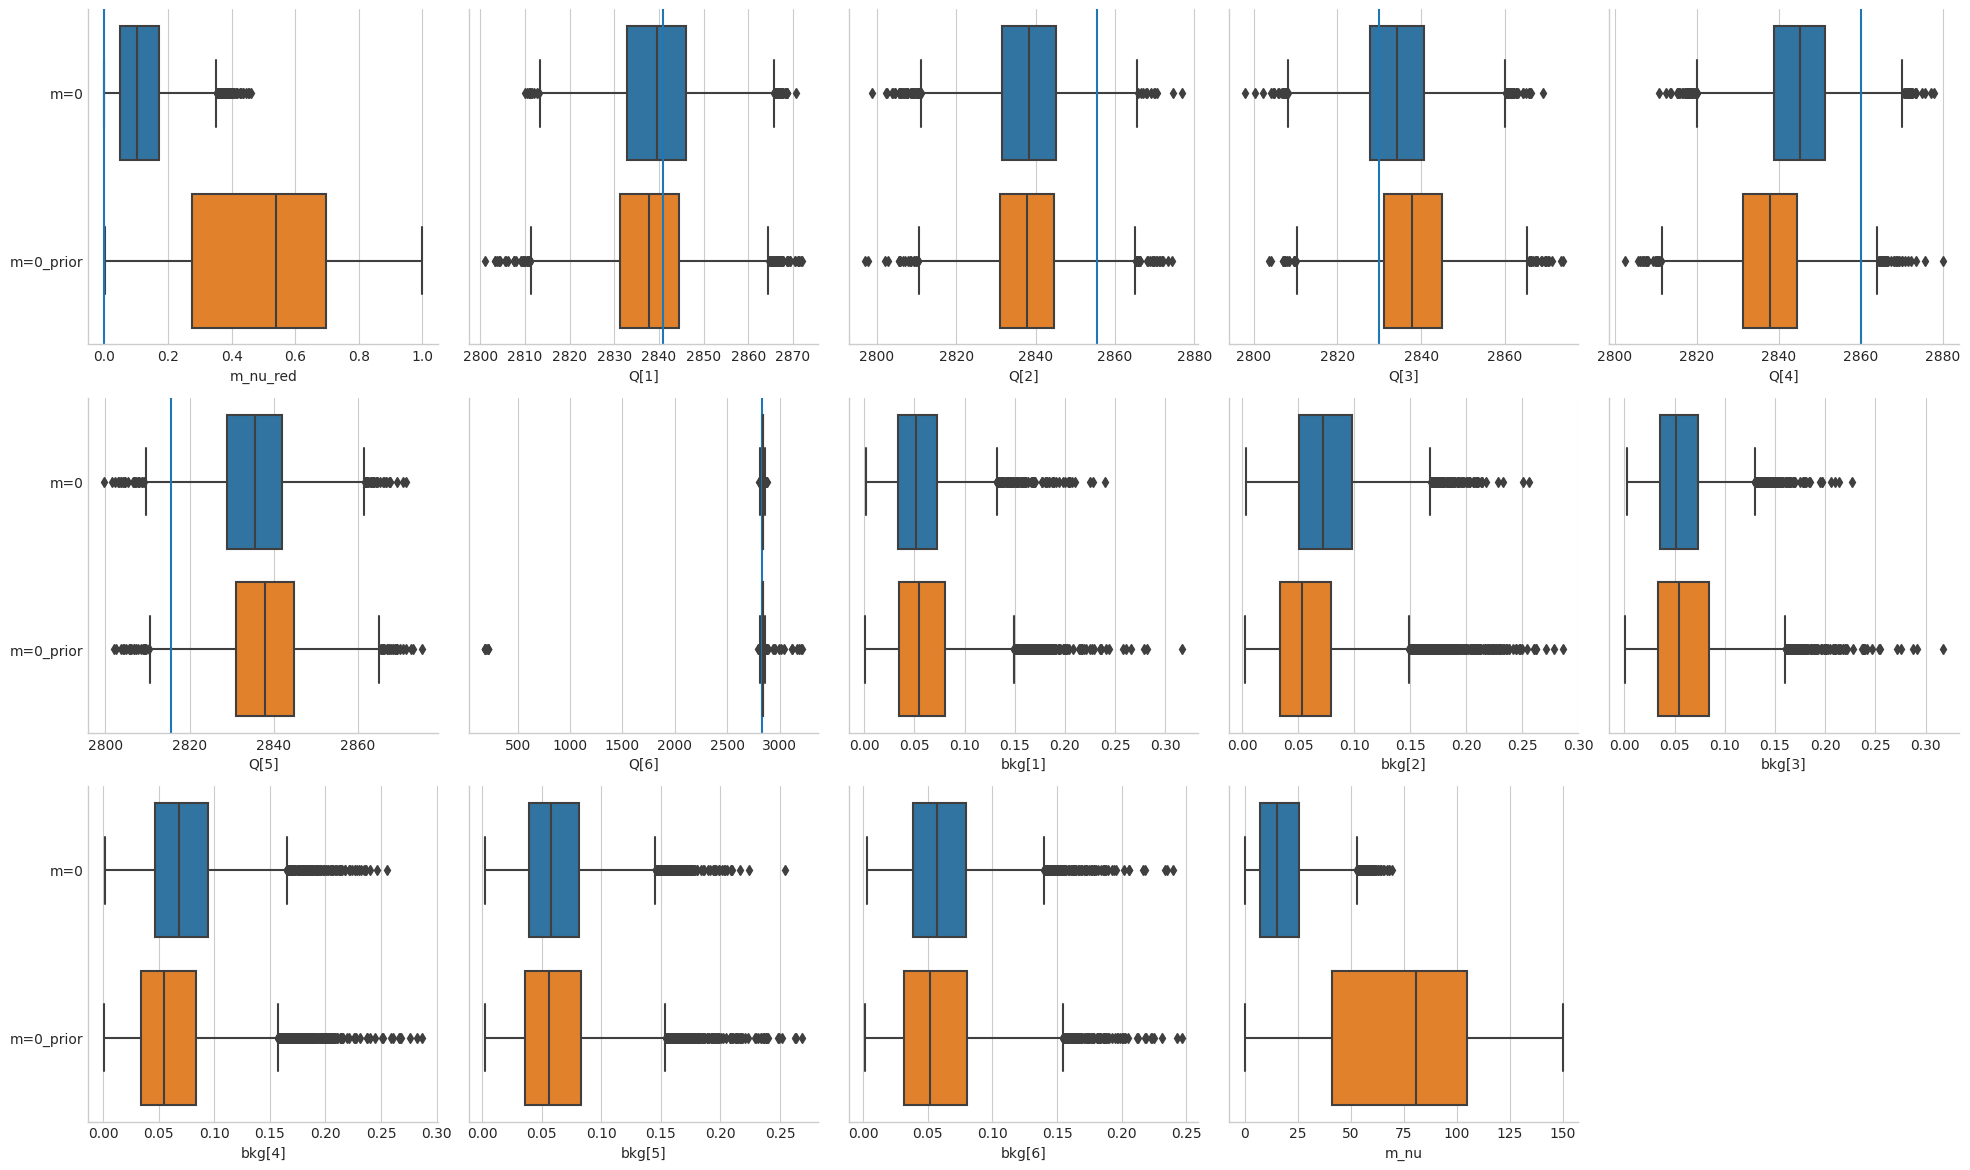

In [6]:
p.add_lines([0, *Qs])